<a href="https://colab.research.google.com/github/ksj1999/DataMining_Group_Project_1/blob/main/GP1_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Dataset & Library

In [ ]:
# !pip install statsmodels

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Clean column names

In [ ]:
concrete_df = pd.read_csv("Concrete_Data.csv")
concrete_df.columns = concrete_df.columns.str.split('(').str[0].str.strip()
concrete_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Check for null

In [ ]:
concrete_df.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

### Train Test Split

In [ ]:
concrete_df_test = concrete_df.iloc[501:631]
print(f"test sample size: {len(concrete_df_test)}", concrete_df_test.head(), '\n\n')
concrete_df_train = concrete_df.drop(concrete_df_test.index)
print(f"train sample size: {len(concrete_df_train)}", concrete_df_train.head())

test sample size: 130      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
501   491.0                26.0    123.0  210.0               3.9   
502   491.0                26.0    123.0  210.0               3.9   
503   491.0                26.0    123.0  210.0               3.9   
504   491.0                26.0    123.0  201.0               3.9   
505   491.0                26.0    123.0  201.0               3.9   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
501             882.0           699.0    3                          25.61  
502             882.0           699.0    7                          33.49  
503             882.0           699.0   56                          59.59  
504             822.0           699.0    3                          29.55  
505             822.0           699.0    7                          37.92   


train sample size: 900    Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0     

### Define Standarize Function (MinMax)

In [ ]:
def norm_data(df, train_df=None):
  if train_df is not None:
    return (df - train_df.min()) / (train_df.max() - train_df.min())
  else:
    return (df - df.min()) / (df.max() - df.min()).replace(0, 1)

# Call multivariate linear regression

In [ ]:
X_train_raw = concrete_df_train.drop(columns=["Concrete compressive strength"])
y_train_raw = concrete_df_train["Concrete compressive strength"]


X_test_raw = concrete_df_test.drop(columns=["Concrete compressive strength"])
y_test_raw = concrete_df_test["Concrete compressive strength"]

### Add Bias term

In [ ]:
X_train_const = sm.add_constant(X_train_raw)
X_test_const = sm.add_constant(X_test_raw)

In [ ]:
# X_train_const = X_train_raw
# X_test_const = X_test_raw

# Fit OLS & Print Results

In [ ]:
model = sm.OLS(y_train_raw, X_train_const)
results = model.fit()

In [ ]:
y_train_pred = results.predict(X_train_const)
y_test_pred = results.predict(X_test_const)

In [ ]:
train_mse = mean_squared_error(y_train_raw, y_train_pred)
test_mse = mean_squared_error(y_test_raw, y_test_pred)
train_r2 = r2_score(y_train_raw, y_train_pred)
test_r2 = r2_score(y_test_raw, y_test_pred)

In [ ]:
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2 (Variance Explained):", train_r2)
print("Test R2 (Variance Explained):", test_r2)
print()
print(results.summary())

Train MSE: 104.1544639349233
Test MSE: 141.2579933004987
Train R2 (Variance Explained): 0.6241001089604974
Test R2 (Variance Explained): 0.3512514382350591

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.624
Model:                                       OLS   Adj. R-squared:                  0.621
Method:                            Least Squares   F-statistic:                     184.9
Date:                           Thu, 16 Oct 2025   Prob (F-statistic):          1.80e-183
Time:                                   00:01:57   Log-Likelihood:                -3367.7
No. Observations:                            900   AIC:                             6753.
Df Residuals:                                891   BIC:                             6797.
Df Model:                                      8                                         
Covariance Type:                 

# Normalized OLS

### Prepare Normalized data

In [ ]:
X_train_norm = norm_data(X_train_raw)
X_test_norm = norm_data(X_test_raw, train_df=X_train_raw)

In [ ]:
X_train_const = sm.add_constant(X_train_norm)
X_test_const = sm.add_constant(X_test_norm)

In [ ]:
model = sm.OLS(y_train_raw, X_train_const)
results = model.fit()

In [ ]:
y_train_pred = results.predict(X_train_const)
y_test_pred = results.predict(X_test_const)

In [ ]:
train_mse = mean_squared_error(y_train_raw, y_train_pred)
test_mse = mean_squared_error(y_test_raw, y_test_pred)
train_r2 = r2_score(y_train_raw, y_train_pred)
test_r2 = r2_score(y_test_raw, y_test_pred)

In [ ]:
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R² (Variance Explained):", train_r2)
print("Test R² (Variance Explained):", test_r2)
print()
print(results.summary())

Train MSE: 104.1544639349233
Test MSE: 141.25799330049725
Train R² (Variance Explained): 0.6241001089604974
Test R² (Variance Explained): 0.35125143823506566

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.624
Model:                                       OLS   Adj. R-squared:                  0.621
Method:                            Least Squares   F-statistic:                     184.9
Date:                           Thu, 16 Oct 2025   Prob (F-statistic):          1.80e-183
Time:                                   00:01:57   Log-Likelihood:                -3367.7
No. Observations:                            900   AIC:                             6753.
Df Residuals:                                891   BIC:                             6797.
Df Model:                                      8                                         
Covariance Type:               

# Log transform

In [ ]:
X_train_log = np.log(X_train_raw + 1)
X_test_log = np.log(X_test_raw + 1)

In [ ]:
X_train_const = sm.add_constant(X_train_log)
X_test_const = sm.add_constant(X_test_log)

In [ ]:
model_log = sm.OLS(y_train_raw, X_train_const)
results_log = model_log.fit()

In [ ]:
y_train_pred = results_log.predict(X_train_const)
y_test_pred = results_log.predict(X_test_const)

In [ ]:
train_mse = mean_squared_error(y_train_raw, y_train_pred)
test_mse = mean_squared_error(y_test_raw, y_test_pred)
train_r2 = r2_score(y_train_raw, y_train_pred)
test_r2 = r2_score(y_test_raw, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R² (Variance Explained):", train_r2)
print("Test R² (Variance Explained):", test_r2)
print()
print(results_log.summary())

Train MSE: 55.83148854882558
Test MSE: 54.51984726570102
Train R² (Variance Explained): 0.7985007106830324
Test R² (Variance Explained): 0.7496094084670611

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.799
Model:                                       OLS   Adj. R-squared:                  0.797
Method:                            Least Squares   F-statistic:                     441.4
Date:                           Thu, 16 Oct 2025   Prob (F-statistic):          8.62e-304
Time:                                   00:01:57   Log-Likelihood:                -3087.1
No. Observations:                            900   AIC:                             6192.
Df Residuals:                                891   BIC:                             6235.
Df Model:                                      8                                         
Covariance Type:                 

# Plot

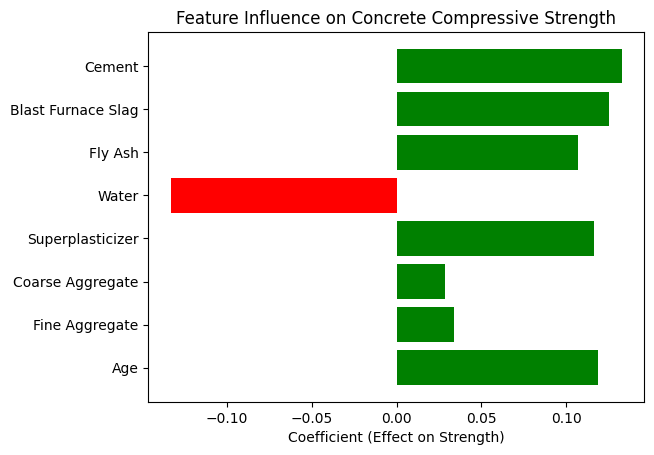

In [ ]:
features = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age"]
coeffs = [0.1328, 0.1250, 0.1067, -0.1331, 0.1162, 0.0286, 0.0341, 0.1188]

plt.barh(features, coeffs, color=['green' if c > 0 else 'red' for c in coeffs])
plt.xlabel("Coefficient (Effect on Strength)")
plt.title("Feature Influence on Concrete Compressive Strength")
plt.gca().invert_yaxis()
plt.show()

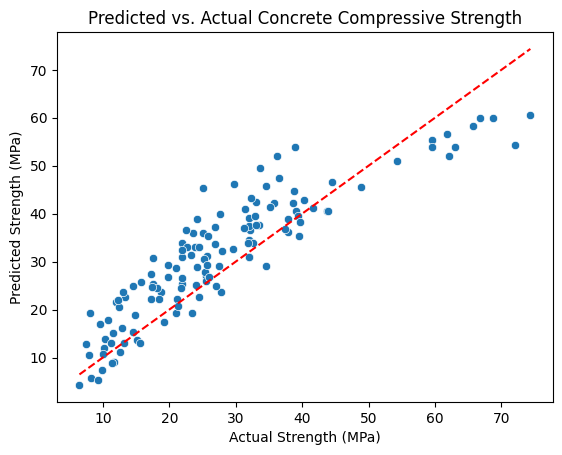

In [ ]:
sns.scatterplot(x=y_test_raw, y=y_test_pred)
plt.plot([y_test_raw.min(), y_test_raw.max()], [y_test_raw.min(), y_test_raw.max()], 'r--')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Predicted vs. Actual Concrete Compressive Strength")
plt.show()

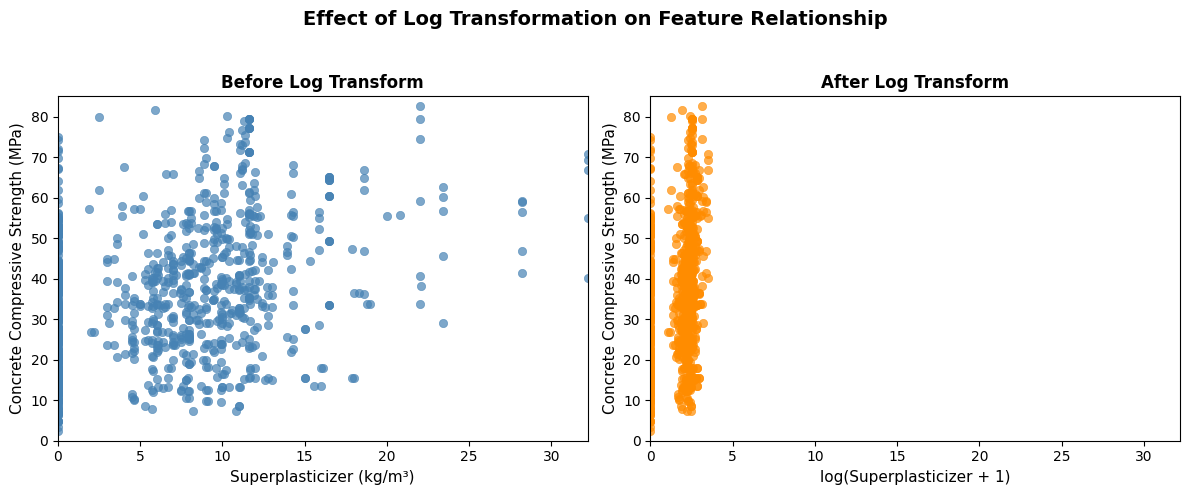

In [ ]:
x = concrete_df_train['Superplasticizer']
y = concrete_df_train['Concrete compressive strength']

x_log = np.log(x + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=x, y=y, ax=axes[0], color='steelblue', alpha=0.7, edgecolor=None)
axes[0].set_title("Before Log Transform", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Superplasticizer (kg/m³)", fontsize=11)
axes[0].set_ylabel("Concrete Compressive Strength (MPa)", fontsize=11)
axes[0].set_xlim(0, x.max())
axes[0].set_ylim(0, 85)

sns.scatterplot(x=x_log, y=y, ax=axes[1], color='darkorange', alpha=0.7, edgecolor=None)
axes[1].set_title("After Log Transform", fontsize=12, fontweight='bold')
axes[1].set_xlabel("log(Superplasticizer + 1)", fontsize=11)
axes[1].set_ylabel("Concrete Compressive Strength (MPa)", fontsize=11)
axes[1].set_xlim(0, x.max())
axes[1].set_ylim(0, 85)

plt.suptitle("Effect of Log Transformation on Feature Relationship", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()